In [1]:
from attack_correlation import *
from data_loader import data_load_into_graph as load
from utils import save_graph, load_graph
from graph_plotter import plot_graph
from factor_graph import *
from pprint import pprint

G, data = load()
# This is a bit pointless rn but works: save_graph(G, "cached_graphs/data_graph.pkl")
# G = load_graph("cached_graphs/data_graph.pkl")

ValueError: This module is deprecated and should no longer be used. Please update your code to use 'config.py' instead.

In [ ]:
H = attack_correlation(G, data)

save_graph(H, "cached_graphs/attack_correlation_graph.pkl")
#H = load_graph("cached_graphs/attack_correlation_graph.pkl")

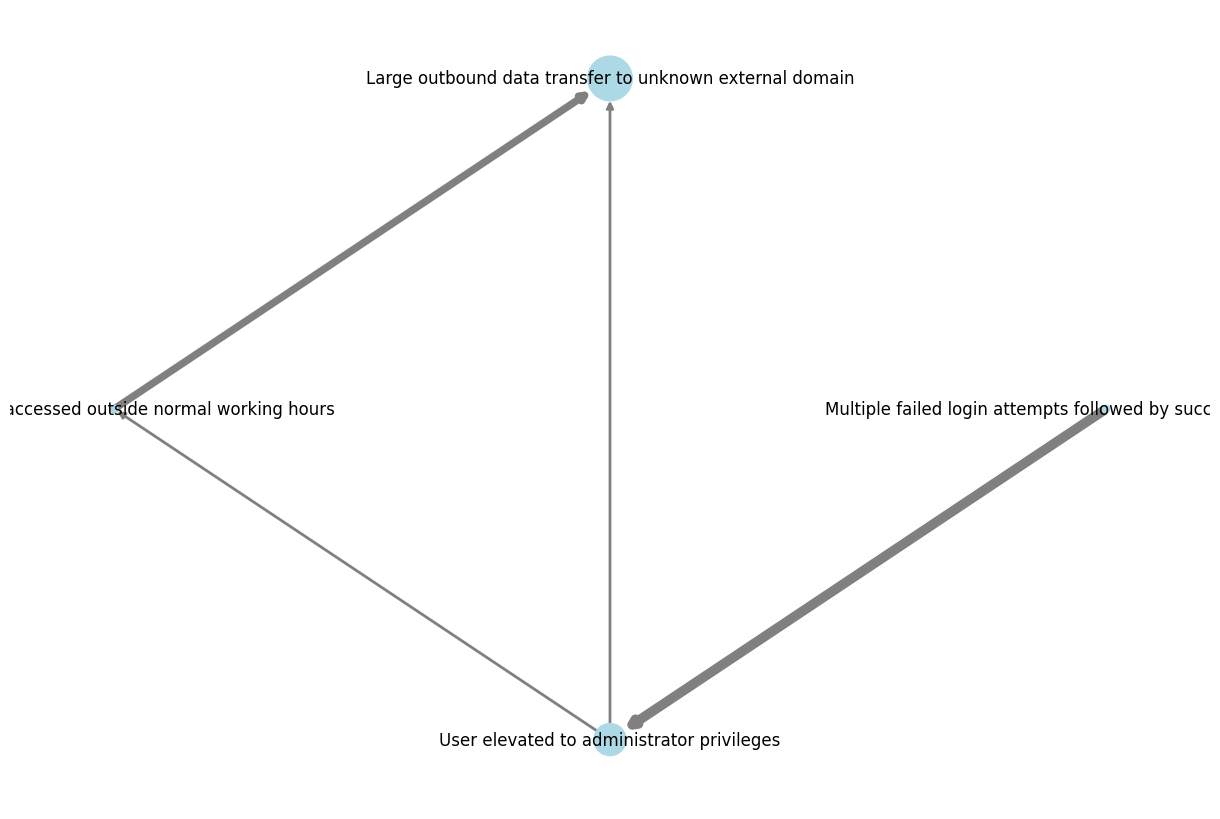

In [ ]:
# Extract components
components = list(nx.connected_components(H.to_undirected()))
components.sort(key=len, reverse=True)

# Take the largest component and create a subgraph
subgraph = H.subgraph(components[0])

plot_graph(subgraph)

In [ ]:
alerts = [event for event in data['events'] if event['id'] in H_sub.nodes()]

fg = FactorGraph(alerts)

m = Messages()
# v = fg.variables["Collection"]
# print(m.marginal(v))
# v = fg.variables["Credential Access"]
# print(m.marginal(v))
pprint(m.marginals(fg))

{'Collection': array([0.11255465, 0.88744535]),
 'Exfiltration': array([0.03183504, 0.96816496]),
 'Initial Access': array([0.05000464, 0.94999536]),
 'Privilege Escalation': array([0.02199335, 0.97800665])}
